In [138]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

from src import Spotify, Recommender
from src.utils import KMeans

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Init Setting

In [139]:
mail_box_id = "6265f7aafe9fef932765c60b"

reco = Recommender(mail_box_id)
reco.init_setting()

# Data Preprocessing

In [140]:
reco.data_preprocessing()

reco.norm_features[:5]

array([[0.23537414965986397, 0.7106537530266344, 0.7272727272727273,
        0.7543572706363404, 0.4018348623853212, 0.383850528859932, 0.0,
        0.09195859872611464, 0.4076339336278174, 0.19603742746822164],
       [0.5714285714285715, 0.7409200968523003, 0.45454545454545453,
        0.874827498083312, 0.02568807339449542, 0.18933061317769567, 0.0,
        0.06488853503184713, 0.9750821157548986, 0.5735452605434265],
       [0.5619047619047619, 0.5883777239709443, 0.09090909090909091,
        0.7830820342448249, 0.0038532110091743146, 0.7290979184739536,
        2.8108108108108107e-06, 0.24495753715498936, 0.04066145656359724,
        0.21632134521914767],
       [0.6884353741496598, 0.41767554479418884, 0.36363636363636365,
        0.6430360337337081, 0.31009174311926613, 0.3329290849640586, 0.0,
        0.27282377919320594, 0.6115075319968287, 0.5024444904397228],
       [0.5564625850340137, 0.5823244552058111, 0.6363636363636364,
        0.7884487605417837, 0.12825688073394498, 

# Reco KMeans
- music filtering의 역할이 관건
- 너무 많이 추천되거나, 너무 적게 추천되는 경우

In [141]:
reco.run()

reco.reco_musics.head()

Start!
ECV 53%
ECV 56%
ECV 56%
ECV 56%
ECV 56%
ECV 56%
ECV 57%
ECV 57%
ECV 57%
ECV 57%
ECV 57%
ECV 57%
[Recommender] Reco Musics Setting Okay :)


,trackId,trackName,artistIds,artistName,image
118,6oZee3RwM7GHykYHZeb7GT,I'm so sick,2uWcrwgWmZcQc3IPBs3tfU,Apink,https://i.scdn.co/image/ab67616d0000b2730b1f5b...
23,3Z4iF2sFcW63WclmUYd7IE,Drinks On Us,0NWbwDZY1VkRqFafuQm6wk,Mike WiLL Made-It,https://i.scdn.co/image/ab67616d0000b273a4f358...
145,1JD37Pmj6xJj8dlWHgLG9C,Dally (feat. GRAY),78sJswwVn4P8aEhkF4K6fQ,Hyolyn,https://i.scdn.co/image/ab67616d0000b2735ec3bf...
75,5ByAIlEEnxYdvpnezg7HTX,Juicy - 2005 Remaster,5me0Irg2ANcsgc93uaYrpb,The Notorious B.I.G.,https://i.scdn.co/image/ab67616d0000b273db0995...
29,3ytPXQa5y40yr1Za9Wj6g7,Hotter Than Hell,6M2wZ9GZgrQXHCFfjv46we,Dua Lipa,https://i.scdn.co/image/ab67616d0000b273425168...


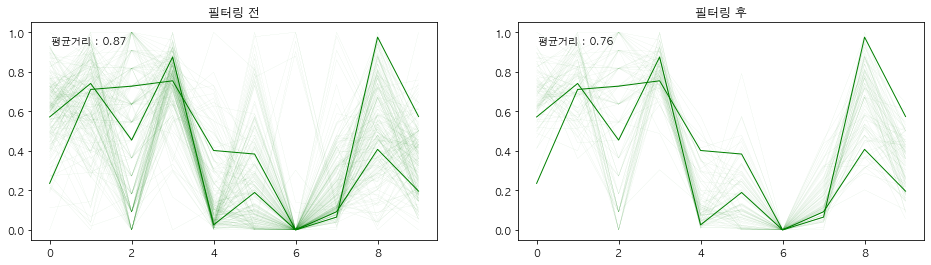

In [142]:
reco.visual_filtering()

# Visual Reco

In [134]:
import datetime as dt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances as euc

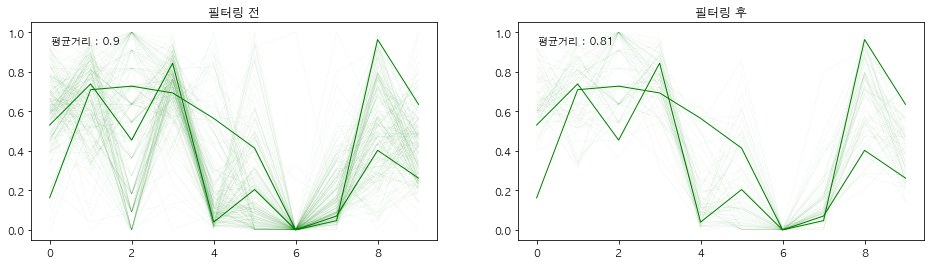

In [137]:
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

features = reco.features_bak
norm_features = reco.norm_features_bak

my_tracks = reco.my_tracks
reco_tracks = reco.reco_musics

chk_idxes = my_tracks['trackId'].values
my_idxes = features[np.isin(features['trackId'], chk_idxes)].index
reco_idxes = features[~np.isin(features['trackId'], chk_idxes)].index

my_features = norm_features[my_idxes]
reco_features = norm_features[reco_idxes]



titles = ['필터링 전', '필터링 후']
plt.figure(figsize=(16,4))

for idx in range(0,2):
    ax = plt.subplot(1,2, idx+1)
    
    euc_check = euc(my_features, reco_features).mean()
    ax.plot(my_features.T, c='g', linewidth=1)
    ax.plot(reco_features.T, c='g', linewidth=0.03)
    
    reco_features = norm_features[
        features[np.isin(features['trackId'],reco_tracks['trackId'])].index
    ]
    
    ax.text(
        0.05,
        0.9,
        "평균거리 : {}".format(round(euc_check * 100) / 100),
        ha='left',
        transform=ax.transAxes
    )
    ax.set_title(titles[idx])

now_time = dt.datetime.now().strftime("%Y%m%dT%H%M%Sms%f")
visual_image = "./visual_images/visual_{}.png".format(now_time)
plt.savefig(visual_image)